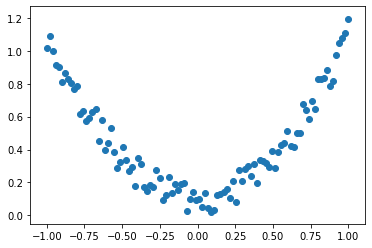

In [1]:
# https://morvanzhou.github.io/tutorials/machine-learning/torch/3-01-regression/

import torch
import matplotlib.pyplot as plt # 視覺化套件

# 產生一個隨機數據 (torch)
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x 軸 (-1 至 1) 100 個點
y = x.pow(2) + 0.2 * torch.rand(x.size())               # y = x ^ 2 + (隨機亂數的偏移)

# 使用 plt 畫出圖形 (numpy)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [2]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):  # 繼承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 定義各層樣式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # nn.Linear(輸入二維張量大小, 輸出二維張量大小)
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 上一級的輸出為這級的輸入

    def forward(self, x):
        # 正向傳播輸入值, 神经網路分析出输出值
        x = F.relu(self.hidden(x))      # 激勵函數
        x = self.predict(x)
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)           # 輸入特徵 : 1, 神經元個數 : 10, 輸出特徵 : 1

print(net)  # net 結構

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


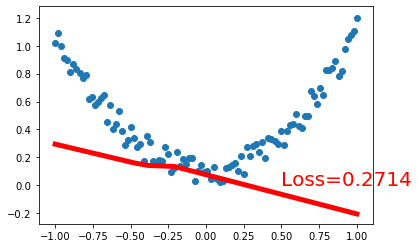

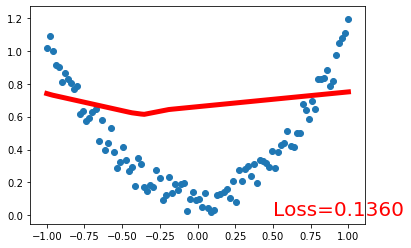

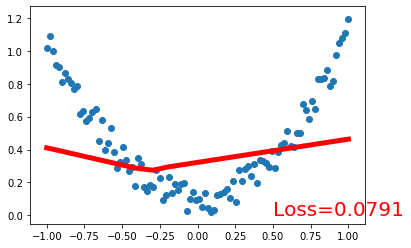

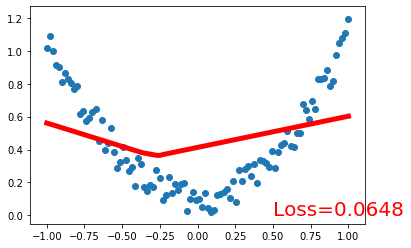

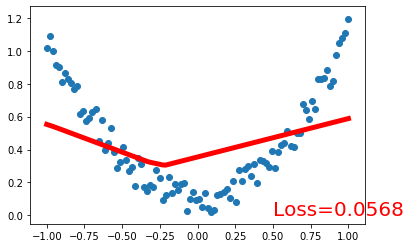

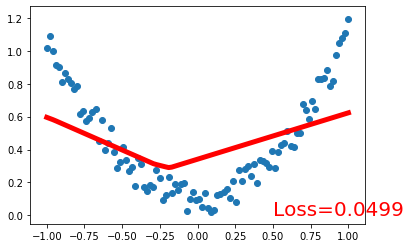

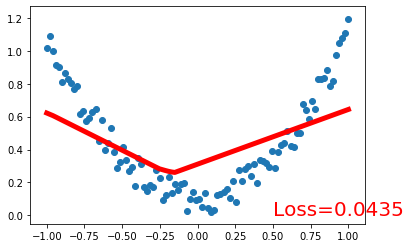

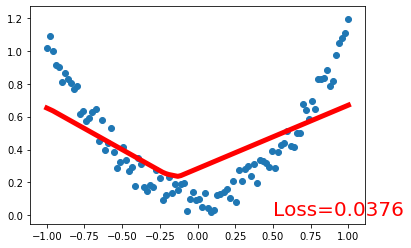

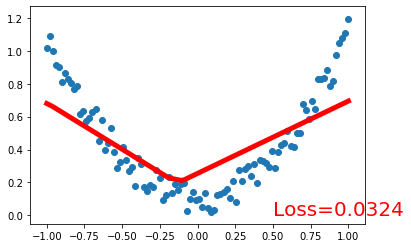

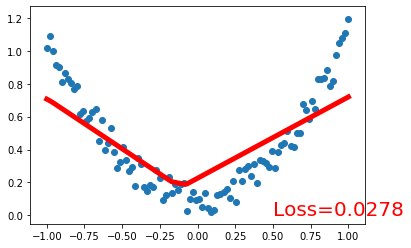

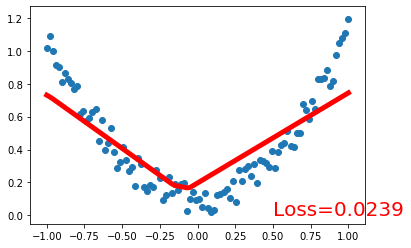

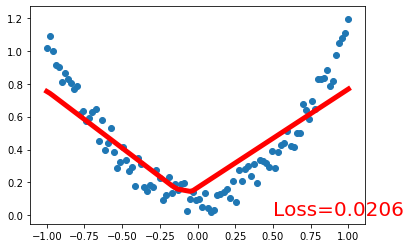

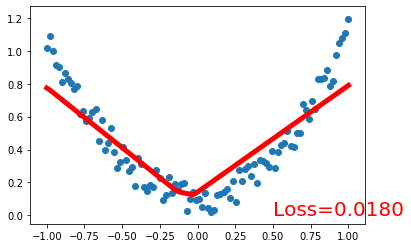

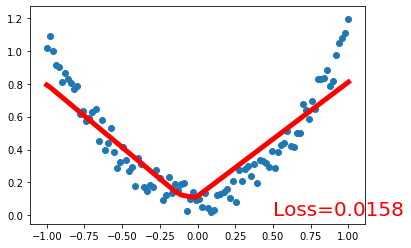

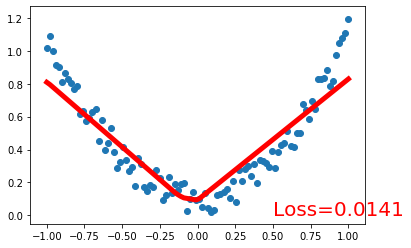

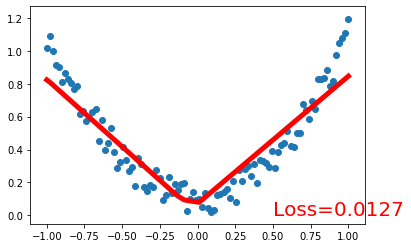

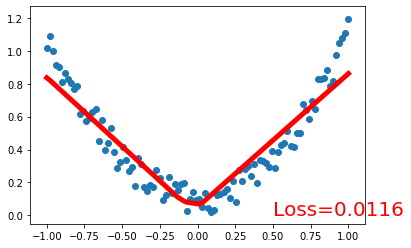

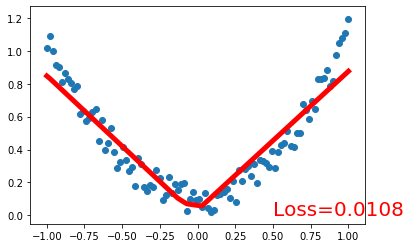

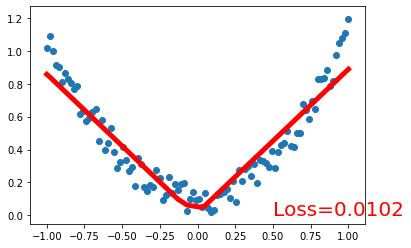

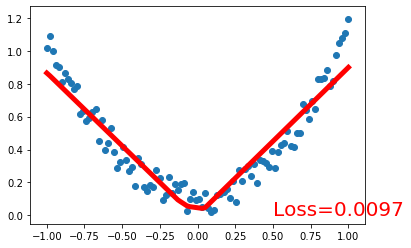

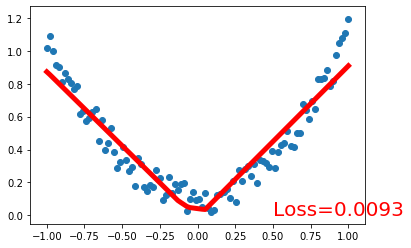

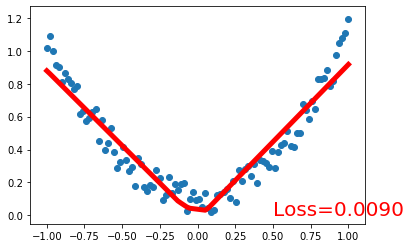

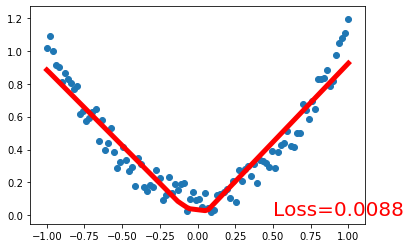

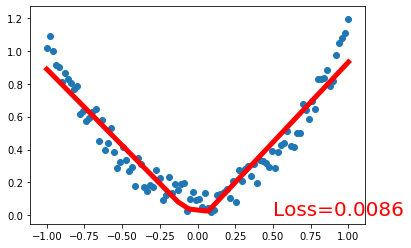

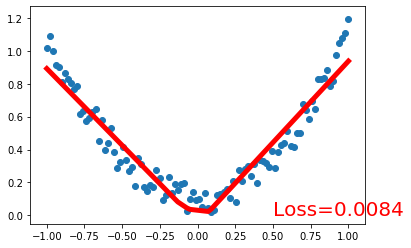

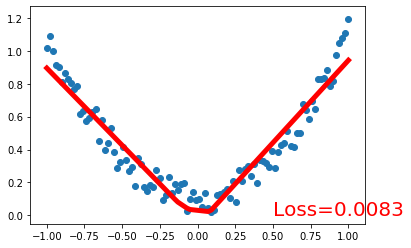

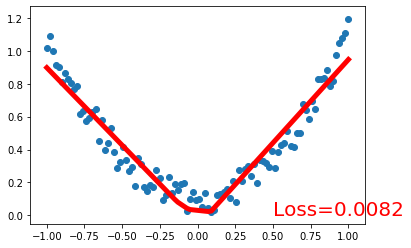

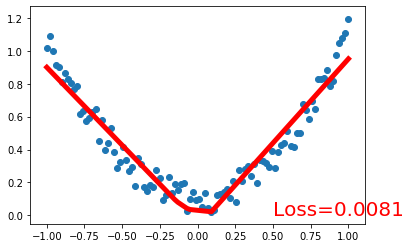

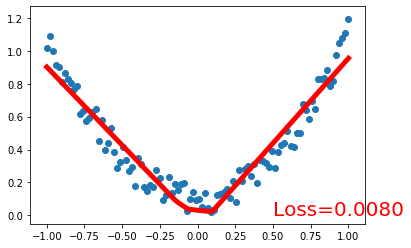

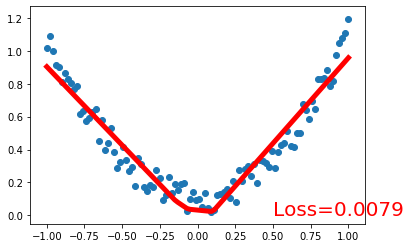

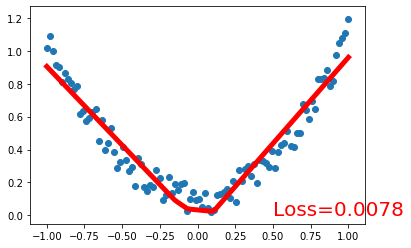

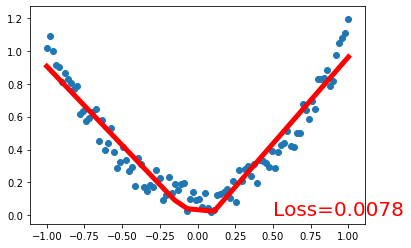

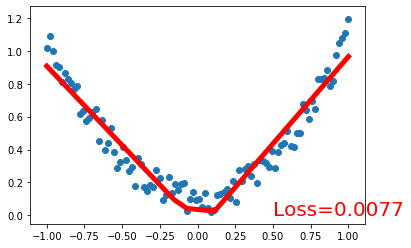

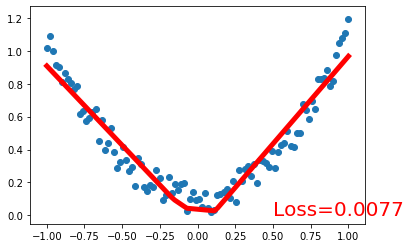

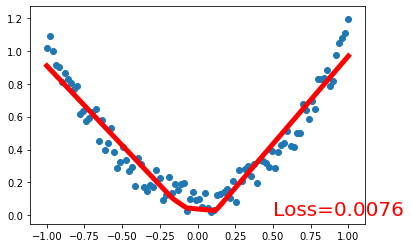

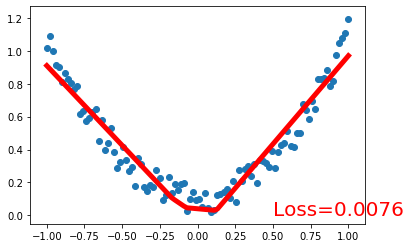

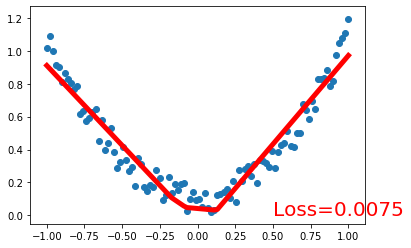

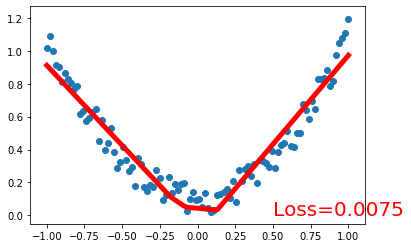

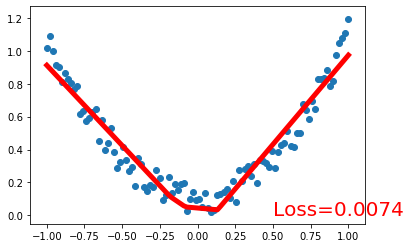

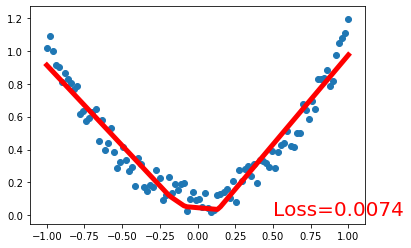

In [3]:
import matplotlib.pyplot as plt

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)   # 使用SGD作為本模型的優化器, lr (Learning Rate) 學習率
                                                        # Stochastic Gradient Descent (隨機梯度下降)
                                                        # https://www.itread01.com/content/1543288024.html
loss_func = torch.nn.MSELoss()      # 預測值和真實值的誤差計算公式 (均方差)

plt.ion()   # 畫出圖
plt.show()

for t in range(200):        # 200 次
    prediction = net(x)     # 輸入數據給 net, 输出预测值

    loss = loss_func(prediction, y)     # 計算兩者的誤差
    
    optimizer.zero_grad()   # 清空數據，梯度更新
    loss.backward()
    optimizer.step()

    # 畫出訓練的狀況
    if t % 5 == 0:
        
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) #圖
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'}) # Loss 值
        plt.pause(0.1)